# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Background
PetMind is a retailer of products for pets. They are based in the United States.
PetMind sells products that are a mix of luxury items and everyday items. Luxury items include
toys. Everyday items include food.
The company wants to increase sales by selling more everyday products repeatedly.
They have been testing this approach for the last year.
They now want a report on how repeat purchases impact sales.

## Task 1 - Importing and Cleaning



For every column in the data:

a. State whether the values match the description given in the table above.

b. State the number of missing values in the column.

c. Describe what you did to make values match the description if they did not
match.

![image](image.png)



**product_id** - no adjustment made since index is 1459 and product_id ended in 1460 as expected

**category** - column is split into 6 category(Equipment, Food, Toys, Medicine, Housing, and Accesory) but has 25 '-' values and relaced  to 'unknown'

**animal** -colum split into 4 category with no missing values, and no adjustment has been made.

**size** - there is a value inconsistency in size column such as (medium, MEDIUM, large, Large), adjusted to a uniform lower case on all categories

**price** - there is 150 'unlisted' in price column and replaced with overall median price of 28.06

**sales** - no null values and rounded to 2 decimal places

**rating** - rating has 150 NULL values and assigned 0 to Null, now the range is from 0-9 with no decimal places as expected.

**repeat_purchase** - Assigned values of 'yes' to 1 and 'no' to 0.

In [1]:
import pandas as pd
import numpy as np
pet_supplies_2212df = pd.read_csv('pet_supplies_2212.csv') 
#pet_supplies_2212df.head(50)

# category with '-' values and relaced  to 'unknown'
pet_supplies_2212df['category'] = pet_supplies_2212df['category'].replace('-', 'unknown')

# make all size column values uniform to lower case
pet_supplies_2212df['size'] = pet_supplies_2212df['size'].str.lower()

#change the 'unlisted' string to the median of existing price.
pet_supplies_2212df['price'] = pd.to_numeric(pet_supplies_2212df['price'], errors='coerce')
median_price = np.median(pet_supplies_2212df['price'].dropna())
pet_supplies_2212df['price'] = pet_supplies_2212df['price'].fillna(median_price)

#rounding to 2 decimal places
pet_supplies_2212df['price'] = pet_supplies_2212df['price'].round(2)
pet_supplies_2212df['sales'] = pet_supplies_2212df['sales'].round(2)


#fill NULL with 0
pet_supplies_2212df['rating'] = pet_supplies_2212df['rating'].fillna(0)

#repeat_purchase change to 'yes' and 'no'
pet_supplies_2212df['repeat_purchase'] = pet_supplies_2212df['repeat_purchase'].replace(1, 'yes')
pet_supplies_2212df['repeat_purchase'] = pet_supplies_2212df['repeat_purchase'].replace(0, 'no')

#Review of the Changes
pet_supplies_2212df.head(100)
  

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.10,1860.62,7.0,yes
1,2,Housing,Bird,medium,35.98,963.60,6.0,no
2,3,Food,Dog,medium,31.23,898.30,5.0,yes
3,4,Medicine,Cat,small,24.95,982.15,6.0,yes
4,5,Housing,Cat,small,26.18,832.63,7.0,yes
...,...,...,...,...,...,...,...,...
95,96,Housing,Cat,medium,21.14,617.64,7.0,yes
96,97,Accessory,Bird,large,42.99,1417.24,5.0,no
97,98,Equipment,Cat,small,27.95,1026.77,6.0,yes
98,99,Equipment,Dog,large,38.00,1447.26,5.0,no


## Task 2

Create a visualization that shows how many products are repeat purchases. Use the
visualization to:

a. State which category of the variable repeat purchases has the most
observations

b. Explain whether the observations are balanced across categories of the
variable repeat purchases

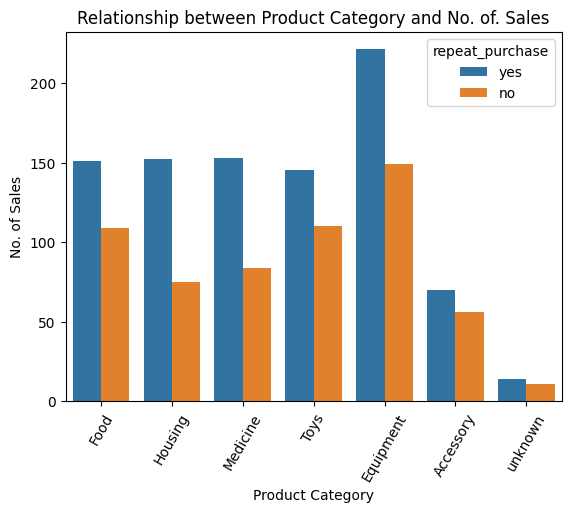

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data= pet_supplies_2212df, x = 'category', hue='repeat_purchase')
plt.xticks(rotation=60)
plt.xlabel('Product Category')
plt.ylabel('No. of Sales')
plt.title('Relationship between Product Category and No. of. Sales')
plt.show()

The "Equipment" has the highest count of repeat purchases across all product category and the "Accessory" section has the lower overall count of sales excluding the category 'unknown'. 

The number of repeated purchase compare to initial purchase is higher across all categories, indicating that there is more returning customer buying products.

## Task 3

Describe the distribution of all of the sales. Your answer must include a visualization
that shows the distribution.

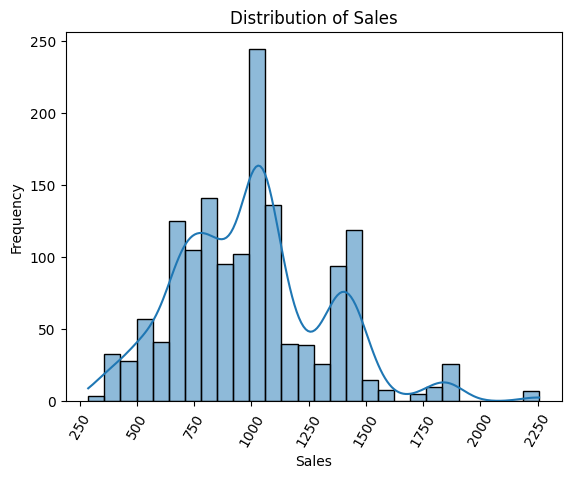

In [3]:
sns.histplot(data=pet_supplies_2212df, x='sales', kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.xticks(rotation=60)
plt.show()

The distribution of sales exhibits a peak around 1000 USD, indicating a relatively high frequency of sales at that value. The range of sales spans from 250 USD to 1800 USD, capturing the majority of the observations. However, there are some outliers where purchases exceed 2200 USD.

## Task 4
Describe the relationship between repeat purchases and sales. Your answer must
include a visualization to demonstrate the relationship.

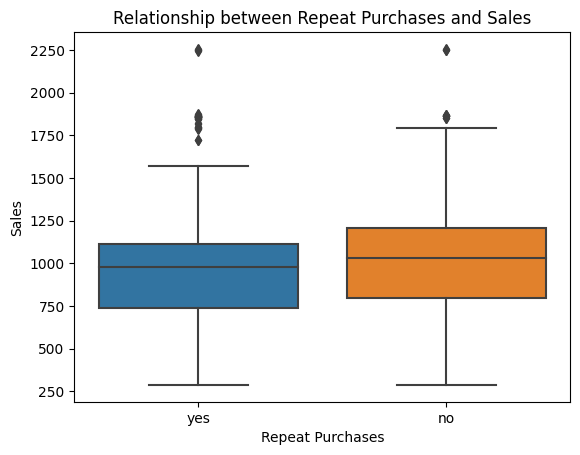

In [4]:

sns.boxplot(data= pet_supplies_2212df, x= 'repeat_purchase', y= 'sales')
plt.xlabel('Repeat Purchases')
plt.ylabel('Sales')
plt.title('Relationship between Repeat Purchase and Sales')
plt.show()

The relationship between repeat purchases and sales can be described based on the box plot visualization. The box plot reveals that the "repeat purchases" category, represented by the "yes" value, has a lower mean of sales compared to the "no" category, which represents initial purchases. There is a noticeable difference in the means of the two groups, indicating that initial purchases tend to have higher sales values on average compared to repeat purchases.

Furthermore, the box plot displays outliers in both categories, indicating a few observations with exceptionally high sales values. These outliers could represent unique or exceptional cases where sales significantly exceed the typical range for both repeat and initial purchases.

Overall, based on the box plot, it can be concluded that repeat purchases generally have lower sales values on average compared to initial purchases, with a narrower spread of sales values and the presence of outliers in both categories.

Repeat purchase account for almost 50% of overall purchases in terms of sales, 
**Acquiring new customers is much more expensive than retaining an existing one. Repeat customers also bring in a significant portion of the revenue. Studies have shown that repeat customers can generate more than 40 percent of the revenue for a business, and increasing customer retention rates by 5 percent can lift profits by 25 to 95 percent.

**For brands offering replenishable products, such as household goods, pet food, beauty essentials, baby products and others, which are consumed repeatedly over a period of time, it is vital to encourage customers to restock their supply on a regular basis. This kind of repeat purchase can boost revenue of investment (ROI), and ensure sustainable growth.  

**keep customers engaged by helping them get the most out of their new purchase with useful information or relevant tips, such as a video of hair and make-up tutorials for customers who bought beauty products, or a blog post about parenting advice for someone who bought baby products.

**Trigger action  customer may restock his pet food every month, or he may replace his toothbrush every three months.

**Discounts, promos and coupons can be effective if used correctly. For first-time buyers, these incentives are a useful way of bringing them back for a second purchase. You can also leverage AI to identify customers who haven’t purchased in a while but likely to return with incentives, and then re-engage with relevant offers to drive repeat purchases.

**Another way of incentivizing repeat purchases is through loyalty programs. Discounts, early access to new products, gamified points system – these are all ways to keep customers coming back, especially for replenishable goods that customers constantly need to buy

In [40]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df with relevant data
pet_supplies_2212df.head()
# Create a pivot table to calculate the sum of values for each category
pivot_df = pet_supplies_2212df.pivot_table(values='sales', index='animal', aggfunc='sum')

# Reset the index of the pivot table
pivot_df = pivot_df.reset_index()

# Melt the pivot table to convert it into long format
melted_df = pet_supplies_2212df.melt(pivot_df, id_vars='animal', value_name='Total', var_name='Category')

# Create a stacked bar plot using Seaborn
#sns.barplot(data=melted_df, x='category_variable', y='Total', hue='Category')

# Set labels and title
#plt.xlabel('Category')
#plt.ylabel('Total')
#plt.title('Stacked Bar Plot')

# Show the plot
#plt.show()


TypeError: melt() got multiple values for argument 'id_vars'